In [79]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit,jit,prange

In [80]:
'''
NN：网格数
ts：时间初值
te：时间末值
x0：一阶微分初值，x初值
v0：二阶微分初值，v初值
'''
class euler_approximation:
    def __init__(self, NN, ts, te, x0, v0):
        self.NN = NN
        self.t = np.linspace(ts,te,NN)
        self.dt = (self.t[-1]-self.t[0])/NN
        self.x = np.zeros(NN)
        self.v = np.zeros(NN)
        self.x[0] = x0
        self.v[0] = v0
        
    # 一阶微分，即x的一阶微分
    def first_order_differential(self,i):
        return self.v[i]
    
    # 二阶微分，即v的一阶微分
    def second_order_differential(self,i):
        # 二阶微分占位
        return 0
    
    def first_approximation(self):
        for i in range(self.NN-1):
            self.x[i+1] = self.x[i]+self.first_order_differential(i)*self.dt
            self.v[i+1] = self.v[i]+self.second_order_differential(i)*self.dt
    
    def second_approximation(self):
        temp_vi = self.second_order_differential(0)
        for i in range(self.NN-1):
            self.x[i+1] = self.x[i]+self.first_order_differential(i)*self.dt
            self.v[i+1] = self.v[i]+temp_vi*self.dt
            self.x[i+1] = self.x[i]+self.v[i]*self.dt + 0.5*(self.v[i+1]-self.v[i])*self.dt
            temp_vip1 = self.second_order_differential(i+1)
            self.v[i+1] = self.v[i]+(temp_vip1+temp_vi)*self.dt/2
            temp_vi = temp_vip1
            

## EXP4-1
假设高楼顶上有一物体掉落，在下落过程中，受到空气的阻力与下落速度的平方成正比，正比系数为$K = 0.05 N\cdot S/m$，物体质量$m=50g$，重力加速度为$9.81m/s^2$，设楼顶处为原点，初速度为0，试用一级欧拉近似法、二级欧拉近似法编程求解下落位移、速度随时间的变化关系$(0\le t\le 3)$

运动方程
$$
mg - \frac{K}{m}\cdot \left(\frac{d x}{d t}\right)^2 = \left(\frac{d{^2 x}}{d{t^2}} \right)
$$

拆分为两一阶方程
$$
\left\{\begin{aligned}
&\frac{d x}{d t} = v
\\
&\frac{d{v}}{d{t}} = mg - \frac{K}{m}\cdot \left(v\right)^2
\end{aligned}\right.
$$

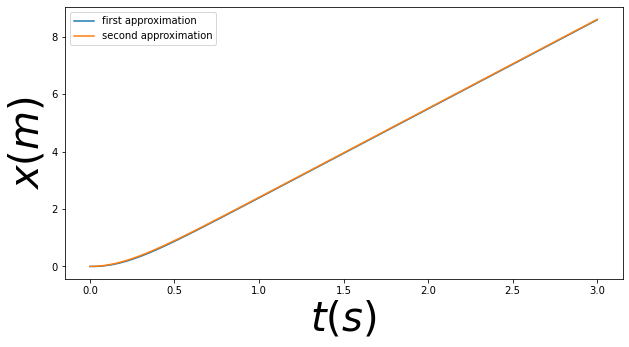

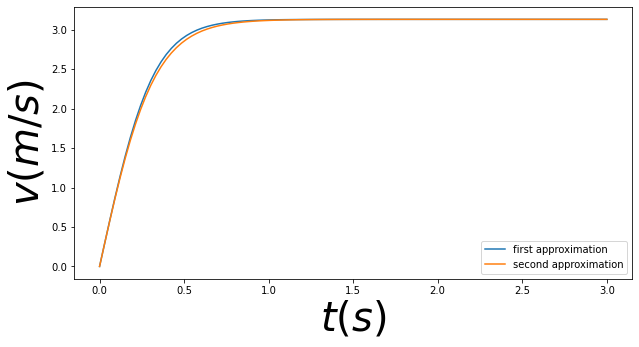

In [81]:
m = 5e-2
k = 0.05
g = 9.81
class exp1(euler_approximation):
    # 二阶微分，即v的一阶微分
    def second_order_differential(self,i):
        return g-k/m*self.v[i]**2

exp11 = exp1(100, 0., 3., 0, 0)
exp11.first_approximation()

exp12 = exp1(100, 0., 3., 0, 0)
exp12.second_approximation()

plt.figure(figsize=(10,5))
plt.plot(exp11.t, exp11.x)
plt.plot(exp12.t, exp12.x)
plt.legend(["first approximation","second approximation"])
plt.ylabel(r'$x(m)$',fontsize=40)
plt.xlabel(r'$t(s)$',fontsize=40)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(exp11.t, exp11.v)
plt.plot(exp12.t, exp12.v)
plt.legend(["first approximation","second approximation"])
plt.ylabel(r'$v(m/s)$',fontsize=40)
plt.xlabel(r'$t(s)$',fontsize=40)
plt.show()

## EXP4-2
已知弹簧振子阻尼振动的方程为
$$
\frac{d^{2} x}{d t^{2}}+2 \beta \frac{d x}{d t}+\omega_{0} x=0 \quad\left(\beta<\omega_{0}\right)
$$

$\omega_0 = 1,t = 0$时，$x = 1.0,v = 0.0,\Delta t = 0.5s$，分别取$\beta = 0.1,0.4$，用二级欧拉法近似画出$s\sim r,v\sim t$曲线$0<t<100$

拆分为一阶方程组
$$
\left\{\begin{aligned}
&\frac{d x}{d t} = v
\\
&\frac{d{v}}{d{t}} = -2\beta v - \omega_0 x
\end{aligned}\right.
$$

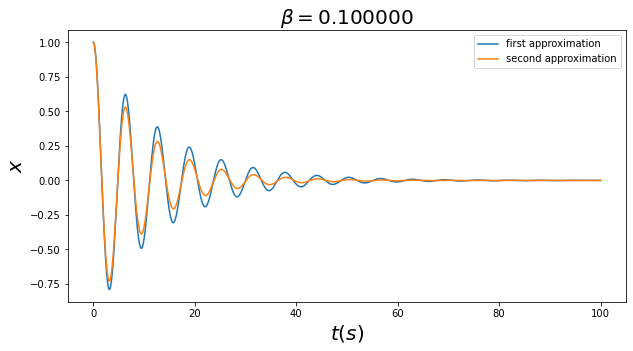

In [82]:
beta = 0.1
omega0 = 1.
class exp21(euler_approximation):
    # 二阶微分，即v的一阶微分
    def second_order_differential(self,i):
        return -2*beta*self.v[i]-omega0*self.x[i]

exp211 = exp21(2000, 0., 100, 1., 0.)
exp211.first_approximation()
exp212 = exp21(2000, 0., 100, 1., 0.)
exp212.second_approximation()

plt.figure(figsize=(10,5))
plt.plot(exp211.t, exp211.x)
plt.plot(exp212.t, exp212.x)
plt.legend(["first approximation","second approximation"])
plt.ylabel(r'$x$',fontsize=20)
plt.xlabel(r'$t(s)$',fontsize=20)
plt.title(r'$\beta = %f$'%beta,fontsize=20)
plt.show()

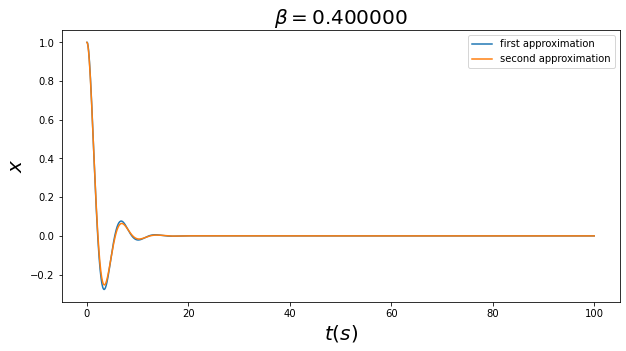

In [83]:
beta = 0.4
omega0 = 1.
class exp21(euler_approximation):
    # 二阶微分，即v的一阶微分
    def second_order_differential(self,i):
        return -2*beta*self.v[i]-omega0*self.x[i]

exp211 = exp21(2000, 0., 100, 1., 0.)
exp211.first_approximation()
exp212 = exp21(2000, 0., 100, 1., 0.)
exp212.second_approximation()

plt.figure(figsize=(10,5))
plt.plot(exp211.t, exp211.x)
plt.plot(exp212.t, exp212.x)
plt.legend(["first approximation","second approximation"])
plt.ylabel(r'$x$',fontsize=20)
plt.xlabel(r'$t(s)$',fontsize=20)
plt.title(r'$\beta = %f$'%beta,fontsize=20)
plt.show()